In [0]:
#Import the require Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")


In [0]:
#Map the Files to the pandas
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [0]:
print("train Data:",train_data.shape)
print("test Data:",test_data.shape)

train Data: (371, 7)
test Data: (529, 6)


In [0]:
print("Train Data Columns:",train_data.columns)
print("Test data Coliumns:",test_data.columns)

Train Data Columns: Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color', 'type'],
      dtype='object')
Test data Coliumns: Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color'],
      dtype='object')


In [0]:
print("Train Data Info:",train_data.info())
print("Test data info:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB
Train Data Info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB
Test data info: None


In [0]:
#Drop the ID Column which is not useful for our analysis
trn_data = train_data.drop(['id'],axis=1)
tst_data =test_data.drop(['id'],axis=1)

In [0]:
print(trn_data.describe(),'\n')
print(tst_data.describe())

       bone_length  rotting_flesh  hair_length    has_soul
count   371.000000     371.000000   371.000000  371.000000
mean      0.434160       0.506848     0.529114    0.471392
std       0.132833       0.146358     0.169902    0.176129
min       0.061032       0.095687     0.134600    0.009402
25%       0.340006       0.414812     0.407428    0.348002
50%       0.434891       0.501552     0.538642    0.466372
75%       0.517223       0.603977     0.647244    0.600610
max       0.817001       0.932466     1.000000    0.935721 

       bone_length  rotting_flesh  hair_length    has_soul
count   529.000000     529.000000   529.000000  529.000000
mean      0.425474       0.503637     0.517288    0.464096
std       0.136079       0.158552     0.171727    0.179659
min       0.000000       0.000000     0.000000    0.000000
25%       0.329383       0.393987     0.388189    0.338964
50%       0.421989       0.510065     0.520220    0.461294
75%       0.519024       0.605957     0.644824    0.58

In [0]:
print(np.sort(trn_data['color'].unique()))
print(np.sort(tst_data['color'].unique()))

['black' 'blood' 'blue' 'clear' 'green' 'white']
['black' 'blood' 'blue' 'clear' 'green' 'white']


In [0]:
print(trn_data.isna().sum(),'\n')
print(tst_data.isna().sum())


bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64 

bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64


Chaning the Color Feature to Descrete using Label Encoder

In [0]:
color_le =preprocessing.LabelEncoder()
trn_data['color_int']=color_le.fit_transform(trn_data['color'])
print(trn_data.head(3))

   bone_length  rotting_flesh  hair_length  has_soul  color    type  color_int
0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul          3
1     0.575560       0.425868     0.531401  0.439899  green  Goblin          4
2     0.467875       0.354330     0.811616  0.791225  black   Ghoul          0


In [0]:
color_le =preprocessing.LabelEncoder()
tst_data['color_int']=color_le.fit_transform(tst_data['color'])
print(tst_data.head(3))

   bone_length  rotting_flesh  hair_length  has_soul  color  color_int
0     0.471774       0.387937     0.706087  0.698537  black          0
1     0.427332       0.645024     0.565558  0.451462  white          5
2     0.549602       0.491931     0.660387  0.449809  black          0


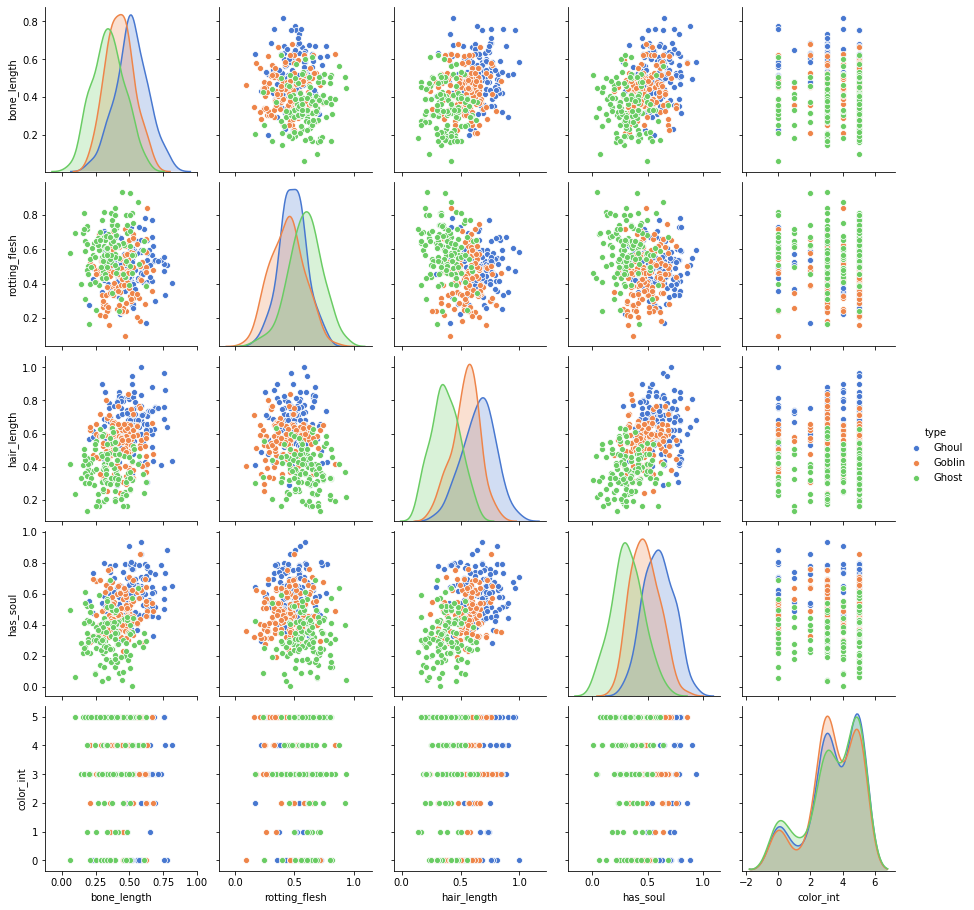

In [0]:
sns.pairplot(trn_data.drop('color',axis=1),hue='type',palette='muted',diag_kind='kde')

In [0]:
#we use the Color Integer column (color_int) only for the visualization, now we can drop the column
trn_data.drop('color_int',axis=1,inplace=True)

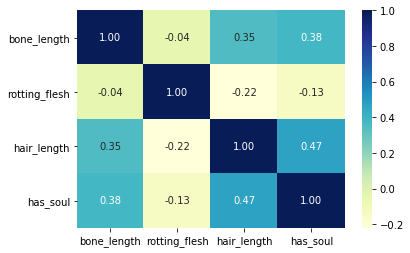

In [0]:
#Show the Correlation between each of the featues via a heatmap
sns.heatmap(trn_data.corr(),annot=True,fmt=".2f",cmap='YlGnBu')

In [0]:
print(trn_data['type'].unique())
print(trn_data['type'].value_counts())

['Ghoul' 'Goblin' 'Ghost']
Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64


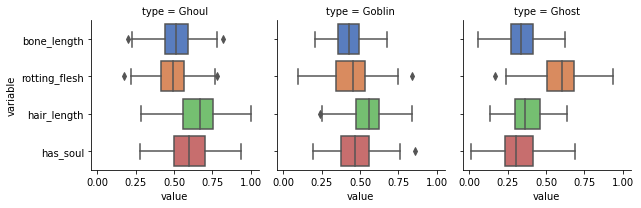

In [0]:
trn_graph = sns.FacetGrid(pd.melt(trn_data,id_vars='type',value_vars=['bone_length','rotting_flesh','hair_length','has_soul']),col='type')
trn_graph=trn_graph.map(sns.boxplot,'value','variable',palette='muted')

DecisionTree Classifier

In [0]:
df = pd.get_dummies(trn_data.drop('type',axis=1))


In [0]:
df

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
366,0.458132,0.391760,0.660590,0.635689,0,0,1,0,0,0
367,0.331936,0.564836,0.539216,0.551471,0,0,0,0,1,0
368,0.481640,0.501147,0.496446,0.544003,0,0,0,1,0,0
369,0.294943,0.771286,0.583503,0.300618,0,0,0,1,0,0


In [0]:
#Train and Test Split data
x_train,x_test,y_train,y_test = train_test_split(df,train_data['type'],test_size=0.25,random_state=0)

In [0]:
x_train.shape

(278, 10)

In [0]:
x_test.shape

(93, 10)

In [0]:
y_train.shape

(278,)

In [0]:
y_test.shape

(93,)

In [0]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [0]:
print("Classification Report:\n",metrics.classification_report(y_test,y_pred))
print("\n Accuracy Score is:",str(metrics.accuracy_score(y_test,y_pred)))
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)

Classification Report:
               precision    recall  f1-score   support

       Ghost       0.77      0.61      0.68        33
       Ghoul       0.57      0.78      0.66        27
      Goblin       0.47      0.42      0.44        33

    accuracy                           0.59        93
   macro avg       0.60      0.60      0.59        93
weighted avg       0.60      0.59      0.59        93


 Accuracy Score is: 0.5913978494623656


Random Forest

In [0]:
x_train = pd.get_dummies(trn_data.drop('type',axis=1))

In [0]:
x_train.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0


In [0]:
y_train = trn_data['type']
y_train.head(3)

0     Ghoul
1    Goblin
2     Ghoul
Name: type, dtype: object

In [0]:
x_test = pd.get_dummies(tst_data)
x_test.head(3)

,bone_length,rotting_flesh,hair_length,has_soul,color_int,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.471774,0.387937,0.706087,0.698537,0,1,0,0,0,0,0
1,0.427332,0.645024,0.565558,0.451462,5,0,0,0,0,0,1
2,0.549602,0.491931,0.660387,0.449809,0,1,0,0,0,0,0


In [0]:
#Create a params dictionary
params ={'n_estimators':[10,20,50,100],'criterion':['gini','entropy'],'max_depth':[None,5,10,25,50]}
rf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rf,param_grid=params,scoring = accuracy_scorer,cv=5,n_jobs=1)
clf.fit(x_train,y_train)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameters:{}'.format(clf.best_params_))
rf_best = RandomForestClassifier(n_estimators=10,random_state=0)

Best Score:0.6927207207207207
Best parameters:{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}


Ensembling Bagging Classifier

In [0]:
params = {'n_estimators':[10,25,50,100],'max_samples':[1,3,5,10]}
bag = BaggingClassifier(random_state=0)
clf = GridSearchCV(bag,param_grid=params,scoring=accuracy_scorer,cv=5,n_jobs=1)
clf.fit(x_train,y_train)
print('Best Score:{}'.format(clf.best_score_))
print('Best Parameter:{}'.format(clf.best_params_))

Best Score:0.7196756756756757
Best Parameter:{'max_samples': 10, 'n_estimators': 50}


Gradient Boosting Classifier

In [0]:
#Gradient Bossting Classifier
params = {'learning_rate':[0.05,0.1,0.5],'n_estimators':[100,200,500],'max_depth':[2,3,5,10]}
gbc = GradientBoostingClassifier(random_state=0)
clf = GridSearchCV(gbc,param_grid=params,scoring = accuracy_scorer,cv=5,n_jobs=1)
clf.fit(x_train,y_train)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameter:{}'.format(clf.best_params_))
gbc_best = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=100,random_state=0)

Best Score:0.7277117117117118
Best parameter:{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


KNN Classifier

In [0]:
params = {'n_neighbors':[3,5,10,20],'leaf_size':[20,30,50],'p':[1,2,5],'weights':['uniform','distance']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,param_grid=params,scoring=accuracy_scorer,cv=5,n_jobs=1)
clf.fit(x_train,y_train)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameter:{}'.format(clf.best_params_))
knc_best=KNeighborsClassifier(n_neighbors=10)

Best Score:0.6685045045045045
Best parameter:{'leaf_size': 20, 'n_neighbors': 20, 'p': 5, 'weights': 'uniform'}


#Logistic Regrssion

In [0]:
params = {'penalty':['l1','l2'],'C':[1,2,3,5,10]}
lr = LogisticRegression(random_state=0)
clf = GridSearchCV(lr,param_grid=params,scoring =accuracy_scorer,cv=5,n_jobs=1)
clf.fit(x_train,y_train)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameter:()'.format(clf.best_params_))
lr_best =LogisticRegression(penalty='l1',C=1,random_state=0)

Best Score:0.7143063063063062
Best parameter:()


Support Vector machine

In [0]:
params = {'kernel':['linear','rbf'],'C':[1,3,5,10],'degree':[3,5,10]}
svc = SVC(probability=True,random_state=0)
clf = GridSearchCV(svc,param_grid=params,scoring=accuracy_scorer,cv=5,n_jobs =1)
clf.fit(x_train,y_train)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameter:{}'.format(clf.best_params_))
svc_best =SVC(C=10,degree=3,kernel ='linear',probability=True,random_state=0)

Best Score:0.7304504504504503
Best parameter:{'C': 5, 'degree': 3, 'kernel': 'linear'}


Voting Classifier

In [0]:
voting_clf = VotingClassifier(estimators=[('rf','rf_best'),('gbc','gbc_best'),('lr','lr_best'),('svc','svc_best')],voting ='hard')
voting_clf = clf.fit(x_train,y_train)
print("\n Accuracy Score for Voting Classifier:"+str(voting_clf.score(x_train,y_train)))



 Accuracy Score for Voting Classifier:0.7789757412398922
